In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from utils import model_performance_regression
from utils import model_performance_classification

In [2]:
df = pd.read_csv("who_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education_no_of_years   32561 non-null  int64 
 5   marital_status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital_gain            32561 non-null  int64 
 11  capital_loss            32561 non-null  int64 
 12  working_hours_per_week  32561 non-null  int64 
 13  native_country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

In [4]:
# checking for missing values
df.isna().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

In [5]:
# check first random 3 rows
df.sample(3)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
21672,55,Private,76860,HS-grad,9,Married-civ-spouse,Other-service,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
24164,42,Self-emp-inc,277488,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,65,United-States,>50K
22705,39,Private,210626,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K


In [6]:
df.shape

(32561, 15)

In [7]:
df["age"].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [8]:
# checking for duplicated values
df.duplicated().sum()

24

In [9]:
# # Check for duplicated rows in the DataFrame
# duplicates = df.duplicated()

# # Filter the DataFrame to show only the duplicated rows
# duplicated_rows = df[duplicates]

# # Print the duplicated rows
# print(duplicated_rows)


In [10]:
# drop dulicate values
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [11]:
df.duplicated().sum()

0

In [12]:
# Remove leading whitespace from each value in the array
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.strip()

In [13]:
# check for "?" in all columns and replace with "missing"
for column in df.columns:
    if df[column].dtype == object:
        df[column] = df[column].replace(' ?', 'missing')

### Fixing workclass

In [14]:
# checking the unique values in  workspace column
df["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [15]:
# # replace " ?" with "unknown"
# df["workclass"].replace(" ?", "unknown", inplace = True)

In [16]:
# Remove leading whitespace from each value in the array
# df["workclass"] = df["workclass"].str.strip()

In [17]:
# df["workclass"].unique()

### Fixing fnlwgt

In [18]:
# checking the unique values in  workspace column
df["fnlwgt"].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302], dtype=int64)

### Fixing education

In [19]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [20]:
# Remove leading whitespace from each value in the array
# df["education"] = df["education"].str.strip()

In [21]:
# Grouping similar categories with unknown
df['education'] = df['education'].replace(['1st-4th', '5th-6th', '7th-8th', '9th', \
                                           '10th', '12th', '11th'], 'Unknown')

In [22]:
df["education"].value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Unknown          4198
Masters          1722
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Preschool          50
Name: education, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32537 non-null  int64 
 1   workclass               32537 non-null  object
 2   fnlwgt                  32537 non-null  int64 
 3   education               32537 non-null  object
 4   education_no_of_years   32537 non-null  int64 
 5   marital_status          32537 non-null  object
 6   occupation              32537 non-null  object
 7   relationship            32537 non-null  object
 8   race                    32537 non-null  object
 9   sex                     32537 non-null  object
 10  capital_gain            32537 non-null  int64 
 11  capital_loss            32537 non-null  int64 
 12  working_hours_per_week  32537 non-null  int64 
 13  native_country          32537 non-null  object
 14  salary                  32537 non-null  object
dtypes:

In [24]:
df["age"].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

### Fixing education_no_of_years

In [25]:
df["education_no_of_years"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

### Fixing 	marital_status

In [26]:
df["marital_status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [27]:
# Remove leading whitespace from each value in the array
# df["marital_status"] = df["marital_status"].str.strip()

In [28]:
# Grouping similar categories
df['marital_status'] = df['marital_status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], \
                                                    'Married')

In [29]:
df["marital_status"].unique()

array(['Never-married', 'Married', 'Divorced', 'Married-spouse-absent',
       'Separated', 'Widowed'], dtype=object)

### Fixing occupation

In [30]:
df["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [31]:
df.head(1)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [32]:
df['education_no_of_years'].value_counts().values

array([10494,  7282,  5353,  1722,  1382,  1175,  1067,   933,   645,
         576,   514,   433,   413,   332,   166,    50], dtype=int64)

In [33]:
df.duplicated().sum()

0

In [34]:
df.isna().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

In [35]:
df.describe()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [36]:
df.duplicated().sum()

0

In [37]:
df.sample(3)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
10938,53,Private,146378,Unknown,3,Married,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
11347,45,Self-emp-not-inc,222374,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
9908,24,Private,154571,Assoc-voc,11,Never-married,Sales,Unmarried,Asian-Pac-Islander,Male,0,0,50,South,<=50K


In [38]:
# Create a mapping dictionary to map categories to numerical values
salary_mapping = {'<=50K': 0, '>50K': 1}

# Apply the mapping to the 'salary' column
df['map_salary'] = df['salary'].map(salary_mapping)


In [39]:
df[df['map_salary'] == 1].value_counts().sum()

7839

In [40]:
from utils import labeled_barplots
from utils import histogram_boxplot
from utils import custom_scatterplot

In [41]:
# labeled_barplots(data = df, feature="marital_status", perc=True)

#### Univariate Analysis

- Numerical Feautures

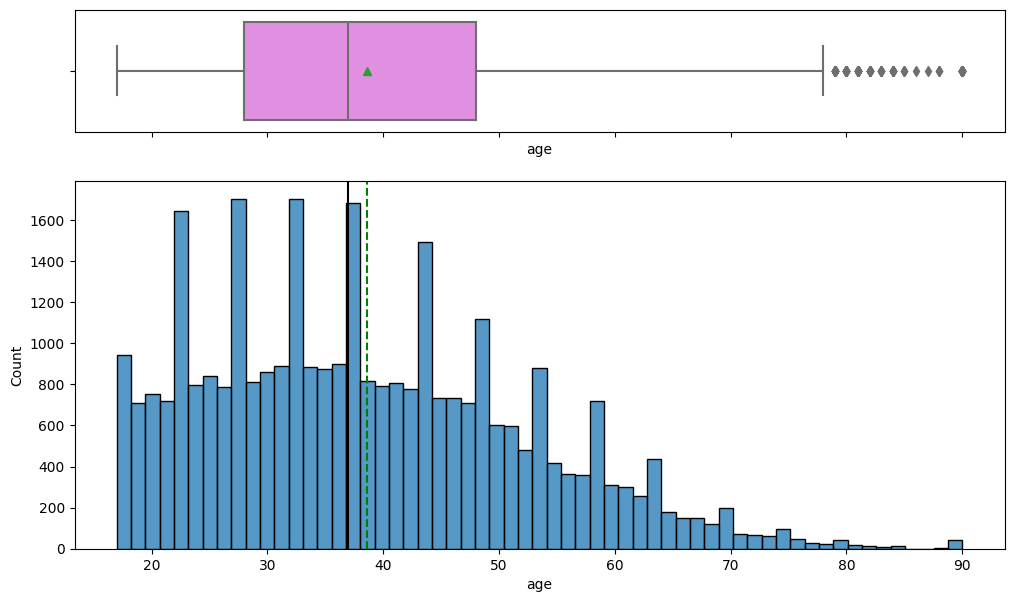

In [42]:
histogram_boxplot(data=df, feature="age")

- This plot shows that alot there are more younger people and fewer in the WHO data and the is sqwed to the left
- The median age in this data tends to be around 38 years even thoug there are outliers in the age, which means there are fewer older people from the upper wiaker, i.e from age 80 above

#### Univariate analysis 

- Categorical Feautures

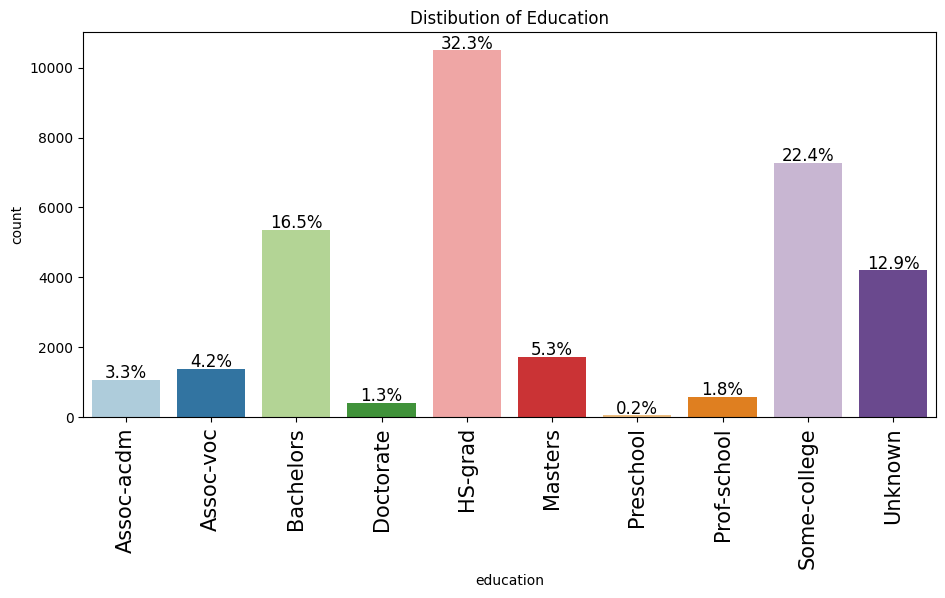

In [43]:
labeled_barplots(data=df, feature="education", perc=True, title="Distibution of Education")

- In the data the givernment got from WHO, most of the people educational degree is HS-grade with
  32% and the second most degree is some-college with 22%
- Preschol degree holder are very few among them

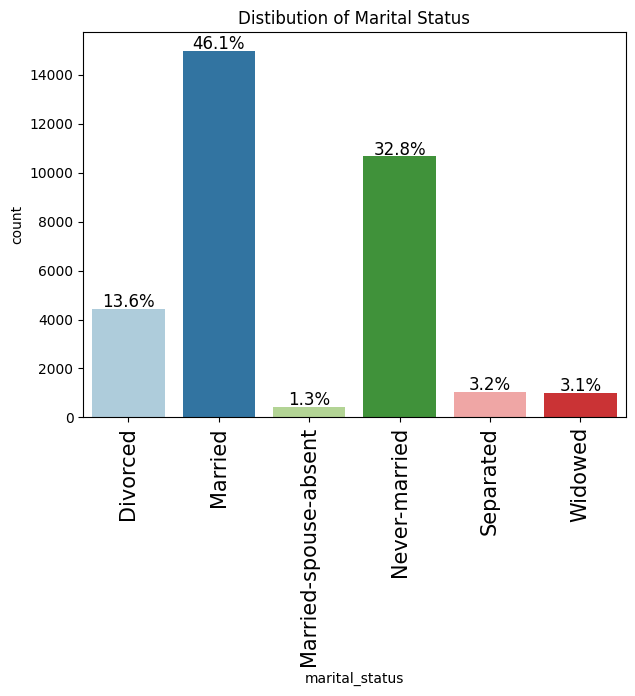

In [44]:
labeled_barplots(data=df, feature="marital_status", perc=True, \
                 title="Distibution of Marital Status")

- A lof of people in the dataset are married, only few are have their status to be Married-spouse-absent, the second most is the Never-married category, problably they are single

In [45]:
from utils import custom_scatterplot

In [46]:
# custom_scatterplot(x="marital_status", y="salary", title="Age against salary", data=df)

## Data Preprocessing

### Outliers detection

In [47]:
numerical_data = df.select_dtypes(include="number")

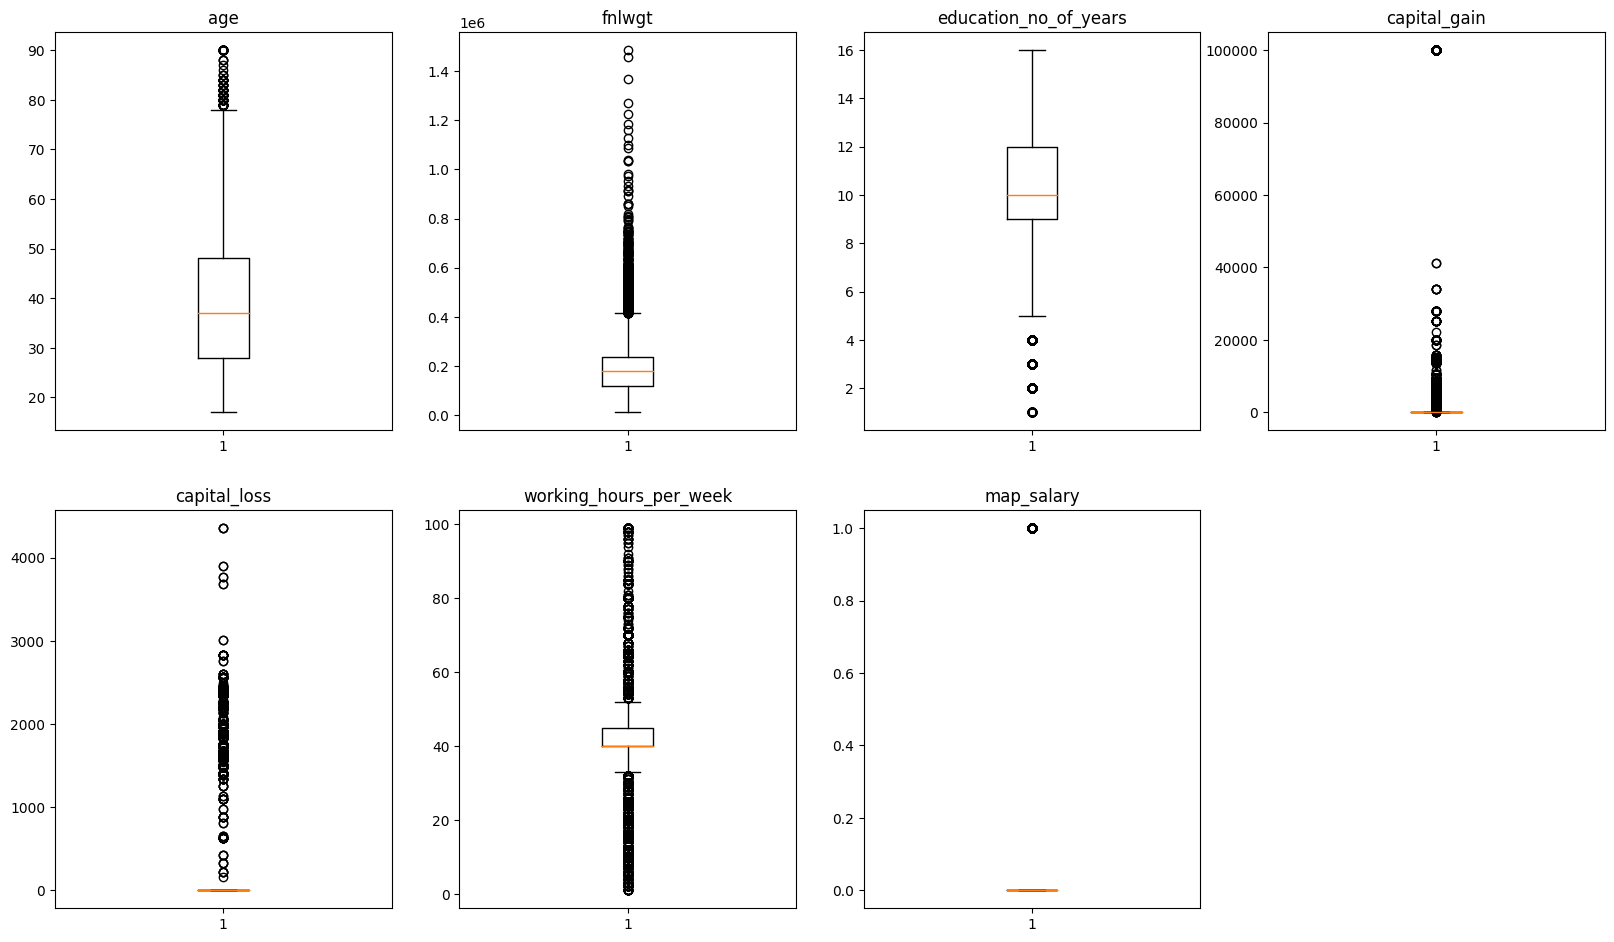

In [48]:
# outlier detection using boxplot

plt.figure(figsize = (20, 30))

for i, variable in enumerate(numerical_data):
  plt.subplot(5, 4, i + 1)
  plt.boxplot(df[variable])
  plt.title(variable)

plt.show()

### Outliers Treatment

In [49]:
from utils import treat_outliers
from utils import treat_outliers_all

In [50]:
df.duplicated().sum()

0

- Outliers treatment is not necceasy in this classification problem because it is 
  whrongly clipping the 1 (>50K) as 0 and also adding some duplicated values

### Building the model

In [51]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from collections import Counter
from sklearn.linear_model import LogisticRegression

In [52]:
# df.columns

In [53]:
# get the features and the target
# X = df.drop("map_salary", axis=1)
X = df[['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'working_hours_per_week']]
y = df['map_salary']

In [54]:
# list(X)

In [55]:
X.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
working_hours_per_week    0
dtype: int64

In [56]:
# perform OneHotEncoding on the independent variables
X = pd.get_dummies(X, drop_first = True)

In [58]:
# the data is inbalance
Counter(y)

Counter({0: 24698, 1: 7839})

In [59]:
#splitting the data into training, validation and testing
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.2, random_state = 0)

In [62]:
# Scale/ Normalize the model 
scaler = StandardScaler()
# scaler = MinMaxScaler()

# Transform the training, validation, and testing data
X_train1 = scaler.fit_transform(X_train)
X_val1 = scaler.transform(X_val)
X_test1 = scaler.transform(X_test)

In [63]:
# create an instance of logistic regression
log_reg = LogisticRegression(random_state=0)

log_reg.fit(X_train1, y_train)

LogisticRegression(random_state=0)

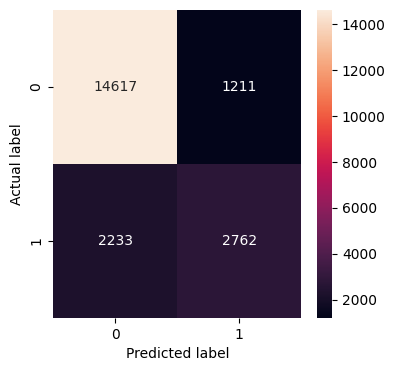

,Accuracy,Recall,Precision,F1-score
0,0.834606,0.552953,0.695193,0.615968


In [64]:
log_reg_train = model_performance_classification(log_reg, X_train1, y_train)
log_reg_train

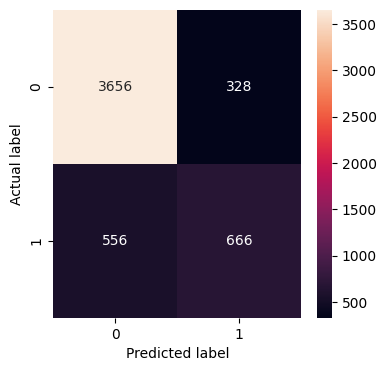

,Accuracy,Recall,Precision,F1-score
0,0.830196,0.545008,0.67002,0.601083


In [65]:
log_reg_val = model_performance_classification(log_reg, X_val1, y_val)
log_reg_val

- This simply means the model is correctly predicting the accuracy on both the training and 
  validation sets, even though the data is not balance
  The model is not reliable because it is prediting that 1211 people who earn less than or equal 
  to 50K dollars to be earning 50K dollars or more
- It is also wrongly redicting that 2233 people who earn more than 50K dollars that they earn less

### Balancing the data

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
# create an instance 
smote = SMOTE(random_state=0)
x_sm, y_sm = smote.fit_resample(X,y)

In [69]:
Counter(y_sm)

Counter({0: 24698, 1: 24698})

In [70]:
y.unique()

array([0, 1], dtype=int64)

In [71]:
# #splitting the data into training, validation and testing
# X_temp_sm, X_test_sm, y_temp_sm, y_test_sm = train_test_split(x_sm, y_sm, test_size = 0.2, random_state = 0)
# X_train_sm, X_val_sm, y_train_sm, y_val_sm = train_test_split(X_temp_sm, y_temp_sm, test_size = 0.2, random_state = 0)

In [78]:
# Scale/ Normalize the model 
scaler = StandardScaler()

# Transform the training, validation, and testing data
X_train2 = scaler.fit_transform(X_train)
X_val2 = scaler.transform(X_val)
X_test2 = scaler.transform(X_test)

In [79]:
# train the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier 

In [80]:
# create an instance
dec_tree = DecisionTreeClassifier(random_state=0)
# Train the model on the scaled training data
dec_tree.fit(X_train_scaled, y_train_sm)

DecisionTreeClassifier(random_state=0)

### Checking the model performance

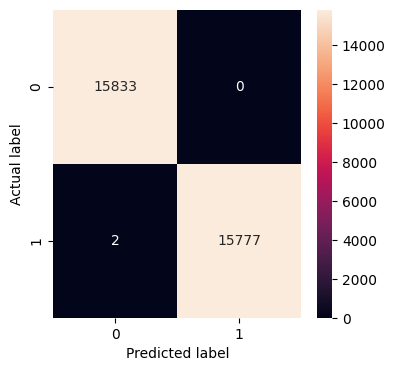

,Accuracy,Recall,Precision,F1-score
0,0.999937,0.999873,1.0,0.999937


In [81]:
dec_tree_train = model_performance_classification(dec_tree, X_train_scaled, y_train_sm)
dec_tree_train

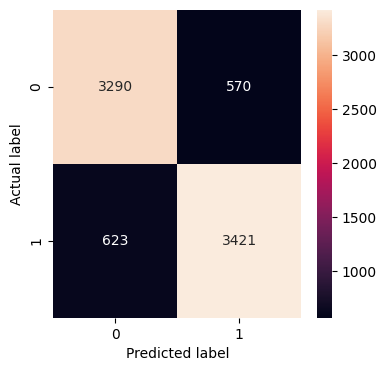

,Accuracy,Recall,Precision,F1-score
0,0.849064,0.845945,0.857179,0.851525


In [82]:
dec_tree_val = model_performance_classification(dec_tree, X_val_scaled, y_val_sm)
dec_tree_val

In [83]:
y_train_sm.value_counts(normalize=True)

0    0.500854
1    0.499146
Name: map_salary, dtype: float64